In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def min_cuad(x, y):
    sumXY = 0
    sumXX = 0
    sumX = 0
    sumY = 0
    n = len(x)
    for i in range(len(x)):
        sumXY += x[i] * y[i]
        sumXX += x[i] ** 2
        sumX += x[i]
        sumY += y[i]

    A = np.array([[n, sumX], [sumX, sumXX]])   
    B = np.array([sumY, sumXY])
    Ainv = np.linalg.inv(A)
    S = np.dot(Ainv,B)
    #print('A-1: ', Ainv)
    #print()
    #print('S: ', S)
    a1 = (n * sumXY - sumX * sumY) / (n * sumXX - sumX ** 2)
    a0 = (sumY - a1 * sumX) / n
    return a0, a1 

In [4]:
x_dato = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
y_dato = np.array([15,18.2,17,19.5,21,23,22.5,24,25,27.5,28,30])


In [27]:
print(min_cuad(x_dato, y_dato))

(14.315151515151499, 1.2681818181818207)


In [5]:
a0, a1 = min_cuad(x_dato, y_dato)
print(a0, a1)

y_est = a0 + a1 * x_dato

media_y = np.mean(y_dato)

num = np.sum((y_est-media_y) ** 2)
den = np.sum((y_dato-media_y) ** 2)
r = np.sqrt(num/den)
print('r =', r)

14.315151515151499 1.2681818181818207
r = 0.9862355368048499


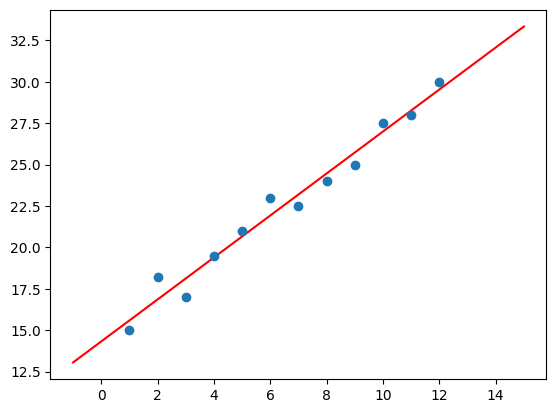

In [6]:
resol = 20
xx = np.linspace(-1, 15, resol)
yy = a0 + a1 * xx

fig,ax = plt.subplots()
ax.plot(xx, yy, 'r')
ax.plot(x_dato, y_dato, 'o')
plt.show()

VARIACIÓN TOTAL, EXPLICADA E INEXPLICADA

In [7]:
ve = sum((y_est - media_y) ** 2)
print('ve =', ve)

vi = sum((y_dato - y_est) ** 2)
print('vi =', vi)

vt = ve + vi
print('vt =', vt)

ve = 229.98477272727362
vi = 6.464393939393937
vt = 236.44916666666757


PREDICCIÓN VENTAS MES 13

In [42]:
x_pred = 13
y_pred = a0 + a1 * x_pred
print(a0, a1)
print('y_pred =', y_pred)

14.315151515151495 1.268181818181821
y_pred = 30.80151515151517


r = 0.9891372017430464


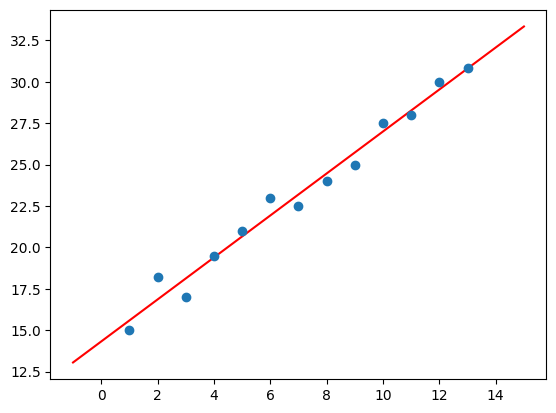

In [50]:
x_dato = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
y_dato = np.array([15,18.2,17,19.5,21,23,22.5,24,25,27.5,28,30,y_pred])


a0, a1 = min_cuad(x_dato, y_dato)

y_est = a0 + a1 * x_dato

media_y = np.mean(y_dato)

num = np.sum((y_est-media_y) ** 2)
den = np.sum((y_dato-media_y) ** 2)
r = np.sqrt(num/den)
print('r =', r)

resol = 20
xx = np.linspace(-1, 15, resol)
yy = a0 + a1 * xx

fig,ax = plt.subplots()
ax.plot(xx, yy, 'r')
ax.plot(x_dato, y_dato, 'o')
plt.show()

CALCULAR INGRESOS ANUALES ACUMULADOS POR CONCEPTO DE VENTA

In [68]:
def f(x):
    return a0 + a1 * x

n_rec = 12
a=0
b=12
delta_x = (b-a)/n_rec
x = np.linspace(a,b,n_rec+1)
#print(x,delta_x)

sum_izq = 0
sum_der = 0
sum_med = 0
for i in range(len(x)-1):
    sum_izq += f(x[i]) * delta_x
    sum_der += f(x[i+1]) * delta_x
    sum_med += f((x[i+1]+x[i])/2) * delta_x
    
print('{:<30} {:<30} {:<30}'. format('Ext izq', 'medio', 'ext der'))
print('{:<30} {:<30} {:<30}'. format(sum_izq,sum_med,sum_der))

Ext izq                        medio                          ext der                       
255.4818181818181              263.09090909090907             270.7                         


In [54]:
meses = np.arange(1,13)
ventas_est = a0 + a1 * meses

a = 1
b = 13
delta_x = (b-a)/len(meses)
ingreso_ac = sum(ventas_est) * delta_x
print(ingreso_ac)

270.7


USANDO SIMPSON 1/3 CALCULAR INGRESOS ANUALES ACUMULADOS (SUAVIZADOS)

In [10]:
def f(x):
    return a0 + a1 * x

a = 1
b = 13
n = 13
x = np.linspace(a, b, n+1)
suma_par = 0
suma_impar = 0

for i in range(1,len(x)-1):
    if i % 2 == 0:
        suma_par +=f(x[i])
    else:
        suma_impar +=f(x[i])
        
integral = (b-a) * (f(x[0]) + 4*suma_impar + 2*suma_par + f(x[n]))/(3*n)
print('Integral =', integral)


Integral = 269.01179845795235


RESPUESTA: SI

PUNTO 2

In [64]:
def f(x):
    return  a0 + a1 * x

def Lag(a,b,n,f,x):
    xi = np.linspace(a,b,n+1)
    sum = 0
    for i in range(n+1):
        prod = 1
        for j in range(n+1):
            if j != i:
                prod *= (x-xi[j])/(xi[i] - xi[j])
        sum += prod*f(xi[i])
    return sum

x = 13
InterpLag = Lag(1,13,13,f,x)
error = abs(InterpLag - f(x))/(f(x))
print('\n')

print('{:<20} {:<20} {:<20}'.format('f(x)', 'Lagrange', '%Error'))
print('{:<20} {:<20} {:<20}'.format(f(x), InterpLag, error*100))



f(x)                 Lagrange             %Error              
30.80151515151517    30.80151515151517    0.0                 


RESPUESTA: NO DIFIERE 